In [ ]:
!pip install numpy-stl
import numpy as np


Read image from the file

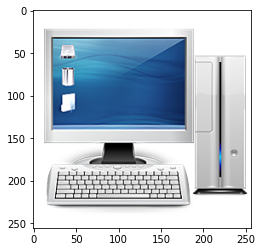

In [43]:
from PIL import Image
import matplotlib.pyplot as plt

grey_im = Image.open("/content/Crystal_Project_computer.png")
plt.imshow(grey_im)

Convert the image to greyscale

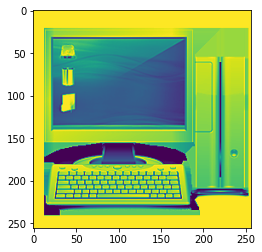

In [44]:
grey_img = Image.open('/content/Crystal_Project_computer.png').convert('L')
plt.imshow(grey_img)

Create N*M array with N triangles


In [46]:
max_size=(2000,2000)
max_height=10
min_height=0

#height=0 for minPix
#height=maxHeight for maxPIx

grey_img.thumbnail(max_size)
imageNp = np.array(grey_img)
maxPix=imageNp.max()
minPix=imageNp.min()



print(imageNp)
(ncols,nrows)=grey_img.size

vertices=np.zeros((nrows,ncols,3))

for x in range(0, ncols):
  for y in range(0, nrows):
    pixelIntensity = imageNp[y][x]
    z = (pixelIntensity * max_height) / maxPix
    #print(imageNp[y][x])
    vertices[y][x]=(x, y, z)

faces=[]

for x in range(0, ncols - 1):
  for y in range(0, nrows - 1):
    # create face 1
    vertice1 = vertices[y][x]
    vertice2 = vertices[y+1][x]
    vertice3 = vertices[y+1][x+1]
    face1 = np.array([vertice1,vertice2,vertice3])

    # create face 2 
    vertice1 = vertices[y][x]
    vertice2 = vertices[y][x+1]
    vertice3 = vertices[y+1][x+1]

    face2 = np.array([vertice1,vertice2,vertice3])

    faces.append(face1)
    faces.append(face2)

print(f"number of faces: {len(faces)}")
facesNp = np.array(faces)

# Create the mesh
surface = mesh.Mesh(np.zeros(facesNp.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        surface.vectors[i][j] = facesNp[i][j]

# Write the mesh to file "surface.stl"
surface.save('surface.stl')
print(surface)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
number of faces: 130050
<Mesh: '' 130050 vertices>
